In [40]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


plt.rcParams.update({
    # --- Font and General Settings ---
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "font.size": 12,
    "savefig.dpi": 600,
    "savefig.format": "pdf",
    
    # --- Legend Settings ---
    "legend.frameon": True,
    "legend.fancybox": False,

    # --- Tick Direction and Visibility (All Sides) ---
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.top": True,        # Enable ticks on top
    "xtick.bottom": True,     # Enable ticks on bottom
    "ytick.left": True,       # Enable ticks on left
    "ytick.right": True,      # Enable ticks on right

    # --- Major Ticks (Bold) ---
    "xtick.major.size": 5,
    "ytick.major.size": 5,
    "xtick.major.width": 1.5, # Make major x-ticks bold (thicker)
    "ytick.major.width": 1.5, # Make major y-ticks bold (thicker)

    # --- Minor Ticks (Visible but not Bold) ---
    "xtick.minor.visible": True,  # Enable minor x-ticks
    "ytick.minor.visible": True,  # Enable minor y-ticks
    "xtick.minor.size": 3,        # Smaller size for minor ticks
    "ytick.minor.size": 3,
    "xtick.minor.width": 0.6,     # Default/Thin width for minor ticks
    "ytick.minor.width": 0.6,

    # --- The "Box" (Spines) Settings ---
    "axes.linewidth": 1.5,        # Make the box (spines) bold/thicker
})

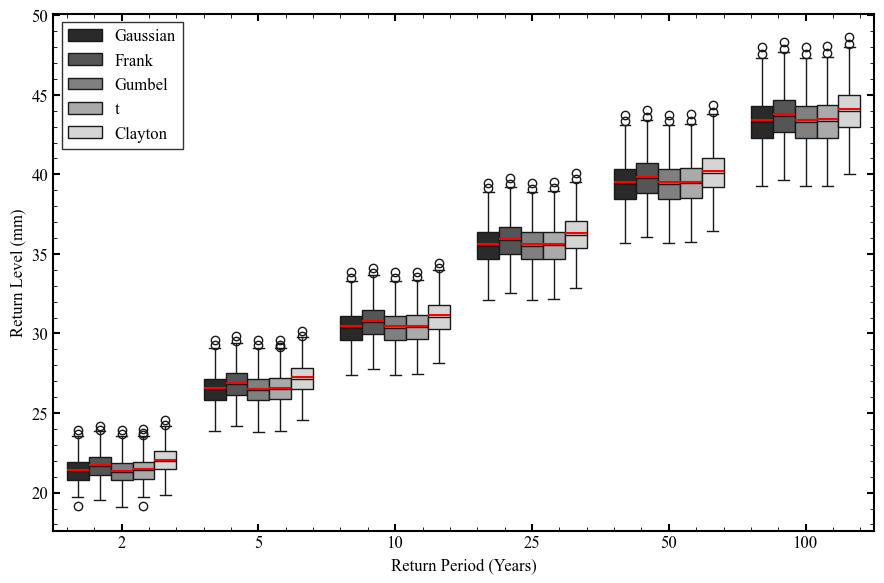

In [42]:

# 1. Load the data
file_path = "/Users/abdelrahmanaltawil/Developer/GitHub/publications-implementation/Dependency Structure of Rainfall Events in Runoff Modeling Using Copulas/data/results/MULTI-STATIONS -- 20251222_013522 -- 9c5d/HAMILTON RBG CS-6153301/03_sensitivity__uncertainty_analysis/01_bootstrap_uncertainty.csv"
df = pd.read_csv(file_path)

# # --- Plot 1: Copula Parameters Uncertainty ---
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=df, x='copula_type', y='parameter', palette="Set2")
# plt.title('Bootstrap Uncertainty: Copula Parameters')
# plt.xlabel('Copula Family')
# plt.ylabel('Parameter Value')
# plt.show()

# --- Plot 2: Return Levels Uncertainty ---
# Melt the DataFrame to long format for plotting return levels
rp_cols = [col for col in df.columns if col.startswith('RP_')]
df_melted = df.melt(
    id_vars=['iteration', 'copula_type'], 
    value_vars=rp_cols, 
    var_name='Return_Period', 
    value_name='Return_Level'
)

# Convert Return_Period to numeric for proper sorting (e.g., "RP_2" -> 2)
df_melted['Return_Period_Num'] = df_melted['Return_Period'].str.replace('RP_', '').astype(int)
df_melted = df_melted.sort_values('Return_Period_Num')

plt.figure(figsize=(9, 6))
sns.boxplot(
    data=df_melted, 
    x='Return_Period_Num', 
    y='Return_Level', 
    hue='copula_type', 
    palette="grey",
    showmeans=True,       # Enable the mean
    meanline=True,        # Make the mean a line instead of a point
    meanprops={
        'color': 'red',   # Set mean line to red
        'linewidth': 1.5, # Make it thick enough to see clearly
        'linestyle': '-'  # Solid line
    }
)
plt.xlabel('Return Period (Years)', fontsize=12)
plt.ylabel('Return Level (mm)', fontsize=12)

# Tick labels (numbers on axes)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# plt.title('Bootstrap Uncertainty: Return Levels')
# plt.legend(title='Copula Family', title_fontsize=12, fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
leg=plt.legend(fontsize=12)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)
plt.tight_layout()
plt.show()


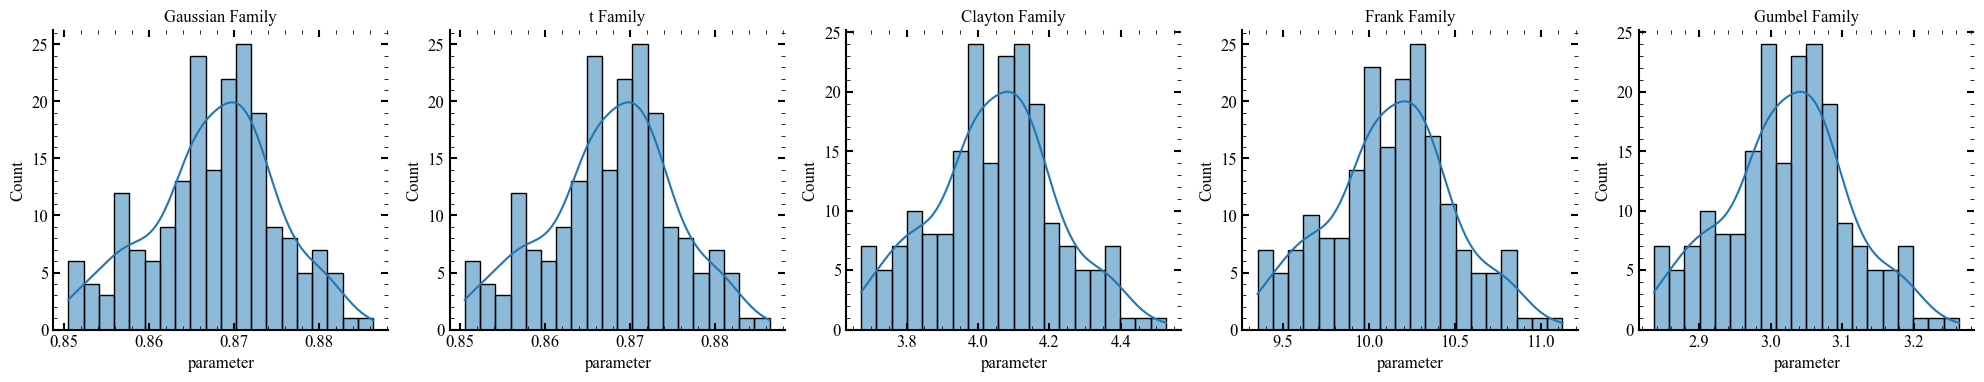

In [ ]:
# Create a FacetGrid allows each plot to have its own scale (sharex=False)
g = sns.FacetGrid(df, col="copula_type", col_wrap=5, sharex=False, sharey=False, height=4)

# Map a histogram or KDE (Kernel Density Estimate) to show distribution shape
g.map(sns.histplot, "parameter", kde=True, bins=20)

g.set_titles("{col_name} Family")
plt.subplots_adjust(top=0.9)
# g.fig.suptitle('Bootstrap Parameter Uncertainty (Independent Scales)')
plt.show()

/var/folders/3w/hd5h2k7x1vj43929dpnp39p40000gn/T/ipykernel_91007/3572938466.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_tau[df_tau['copula_type'] != 'Frank'], x='copula_type', y='tau', palette="gray",


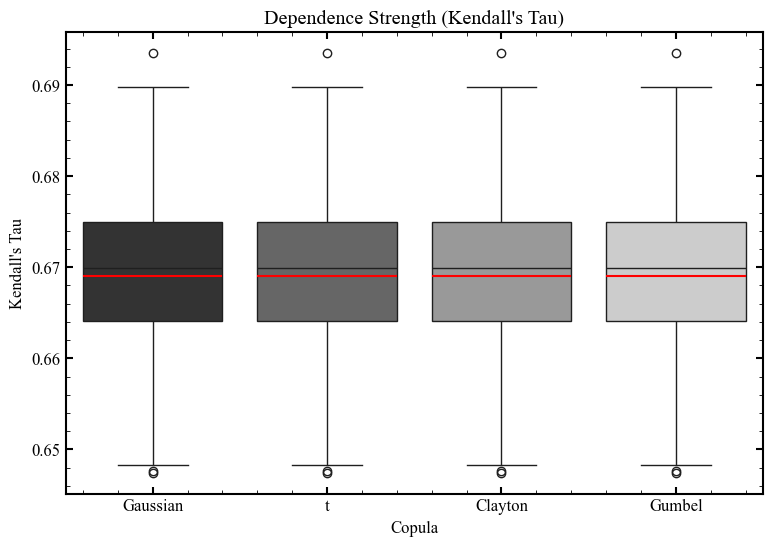

In [6]:
import numpy as np

# Create a copy to avoid SettingWithCopy warnings
df_tau = df.copy()

# 1. Gaussian & t: tau = (2/pi) * arcsin(rho)
df_tau.loc[df_tau['copula_type'].isin(['Gaussian', 't']), 'tau'] = \
    (2 / np.pi) * np.arcsin(df_tau.loc[df_tau['copula_type'].isin(['Gaussian', 't']), 'parameter'])

# 2. Gumbel: tau = 1 - 1/theta
df_tau.loc[df_tau['copula_type'] == 'Gumbel', 'tau'] = \
    1 - (1 / df_tau.loc[df_tau['copula_type'] == 'Gumbel', 'parameter'])

# 3. Clayton: tau = theta / (theta + 2)
df_tau.loc[df_tau['copula_type'] == 'Clayton', 'tau'] = \
    df_tau.loc[df_tau['copula_type'] == 'Clayton', 'parameter'] / \
    (df_tau.loc[df_tau['copula_type'] == 'Clayton', 'parameter'] + 2)

# 4. Frank: (Approximation is complex, but for plotting, many skip it or use a library func)
# For now, let's plot the ones we have converted:

plt.figure(figsize=(9, 6))
sns.boxplot(data=df_tau[df_tau['copula_type'] != 'Frank'], x='copula_type', y='tau', palette="gray",
    showmeans=True,       # Enable the mean
    meanline=True,        # Make the mean a line instead of a point
    meanprops={
        'color': 'red',   # Set mean line to red
        'linewidth': 1.5, # Make it thick enough to see clearly
        'linestyle': '-'  # Solid line
    })
plt.title('Dependence Strength (Kendall\'s Tau)')
plt.xlabel('Copula')
plt.ylabel('Kendall\'s Tau')
plt.show()

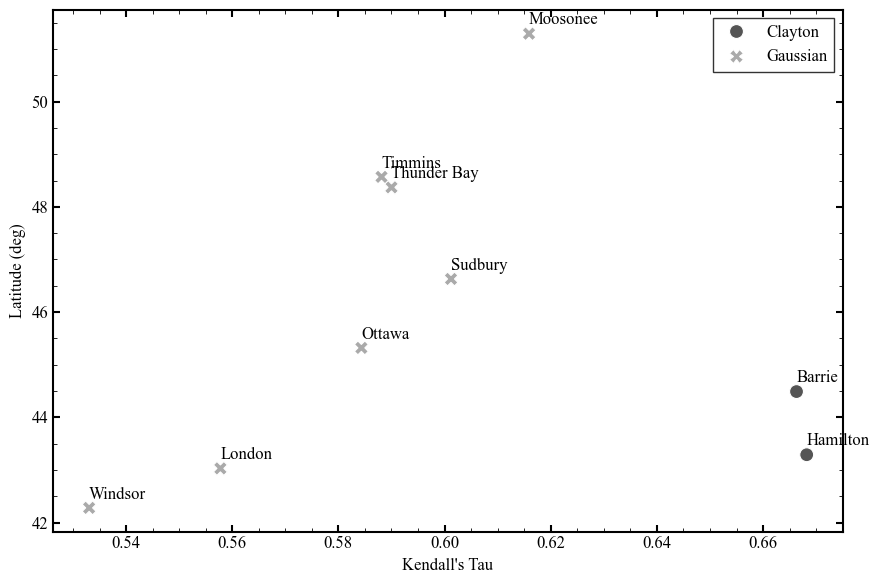

In [38]:
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Multi-station physical consistency checks
base_dir = Path("/Users/abdelrahmanaltawil/Developer/GitHub/publications-implementation/Dependency Structure of Rainfall Events in Runoff Modeling Using Copulas/data/results/MULTI-STATIONS -- 20251222_005057 -- 22ff")
tau_source = "fitted_best_aic"  # 'fitted_best_aic' or 'empirical'

# Coordinates are approximate city/airport locations; replace with station-accurate values if needed.
station_coords = pd.DataFrame([
    {"station_id": "6153301", "station_name": "HAMILTON RBG CS", "label": "Hamilton", "latitude": 43.29, "longitude": -79.87},
    {"station_id": "6139525", "station_name": "WINDSOR A", "label": "Windsor", "latitude": 42.28, "longitude": -82.96},
    {"station_id": "6144475", "station_name": "LONDON A", "label": "London", "latitude": 43.03, "longitude": -81.15},
    {"station_id": "6106000", "station_name": "OTTAWA MACDONALD-CARTIER INT'L A", "label": "Ottawa", "latitude": 45.32, "longitude": -75.67},
    {"station_id": "6117700", "station_name": "BARRIE-ORO", "label": "Barrie", "latitude": 44.49, "longitude": -79.56},
    {"station_id": "6068150", "station_name": "SUDBURY A", "label": "Sudbury", "latitude": 46.63, "longitude": -80.80},
    {"station_id": "6048261", "station_name": "THUNDER BAY A", "label": "Thunder Bay", "latitude": 48.37, "longitude": -89.32},
    {"station_id": "6078285", "station_name": "TIMMINS VICTOR POWER A", "label": "Timmins", "latitude": 48.57, "longitude": -81.38},
    {"station_id": "6075425", "station_name": "MOOSONEE UA", "label": "Moosonee", "latitude": 51.29, "longitude": -80.61},
])
station_coords = station_coords.set_index("station_id")

station_dirs = sorted([
    p for p in base_dir.iterdir()
    if p.is_dir() and (p / "02_copula_fitting/02_copula_fit_metrics.csv").exists()
])

records = []
missing_coords = []
for station_dir in station_dirs:
    station_name, station_id = station_dir.name.rsplit("-", 1)
    station_name = station_name.strip()
    station_id = station_id.strip()

    metrics_path = station_dir / "02_copula_fitting/02_copula_fit_metrics.csv"
    metrics = pd.read_csv(metrics_path).dropna(subset=["AIC"])
    if metrics.empty:
        continue

    best_row = metrics.loc[metrics["AIC"].idxmin()]
    best_family = best_row["Family"]
    tau_fitted = best_row["tau"]

    if tau_source == "empirical":
        events_path = station_dir / "01_input_data/03_rainfall_events_data.csv"
        events = pd.read_csv(events_path)[["Peak Precipitation (mm)", "Volume (mm)"]].dropna()
        tau = events.corr(method="kendall").iloc[0, 1] if not events.empty else np.nan
    else:
        tau = tau_fitted

    if station_id in station_coords.index:
        coords = station_coords.loc[station_id]
        latitude = coords["latitude"]
        longitude = coords["longitude"]
        label = coords["label"]
    else:
        missing_coords.append(f"{station_name} ({station_id})")
        latitude = np.nan
        longitude = np.nan
        label = station_name

    records.append({
        "station_id": station_id,
        "station_name": station_name,
        "label": label,
        "tau": tau,
        "best_family": best_family,
        "best_aic": best_row["AIC"],
        "latitude": latitude,
        "longitude": longitude,
    })

station_summary = pd.DataFrame(records)

if missing_coords:
    print("Missing coordinates for:".join(missing_coords))

plot_df = station_summary.dropna(subset=["latitude", "longitude"])

# 1) Latitude vs. dependence (Kendall's tau)
plt.figure(figsize=(9, 6))
sns.scatterplot(data=plot_df, x="tau", y="latitude", hue="best_family", style="best_family", palette="grey", s=100)
for _, row in plot_df.iterrows():
    plt.text(row["tau"], row["latitude"]+0.1, row["label"], ha="left", va="bottom")
# plt.title("Latitude vs. Kendall's Tau")
plt.xlabel("Kendall's Tau")
plt.ylabel("Latitude (deg)")
# plt.gca().set_aspect("equal", adjustable="box")
leg = plt.legend(fontsize=12)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)
plt.tight_layout()
plt.show()

# # 2) Spatial robustness of best family (simple Ontario map)
# plt.figure(figsize=(8, 8))
# sns.scatterplot(data=plot_df, x="longitude", y="latitude", hue="best_family", style="best_family", palette="grey", s=100)
# for _, row in plot_df.iterrows():
#     plt.text(row["longitude"], row["latitude"]+0.1, row["label"], ha="left", va="bottom")
# xpad = (plot_df["longitude"].max() - plot_df["longitude"].min()) * 0.08
# ypad = (plot_df["latitude"].max() - plot_df["latitude"].min()) * 0.08
# plt.xlim(plot_df["longitude"].min() - xpad, plot_df["longitude"].max() + xpad)
# plt.ylim(plot_df["latitude"].min() - ypad, plot_df["latitude"].max() + ypad)
# plt.title("Best Copula Family by Station (Ontario)")
# plt.xlabel("Longitude (deg)")
# plt.ylabel("Latitude (deg)")
# plt.gca().set_aspect("equal", adjustable="box")
# plt.legend(title="Best family", bbox_to_anchor=(1.05, 1), loc="upper left")
# plt.tight_layout()
# plt.show()


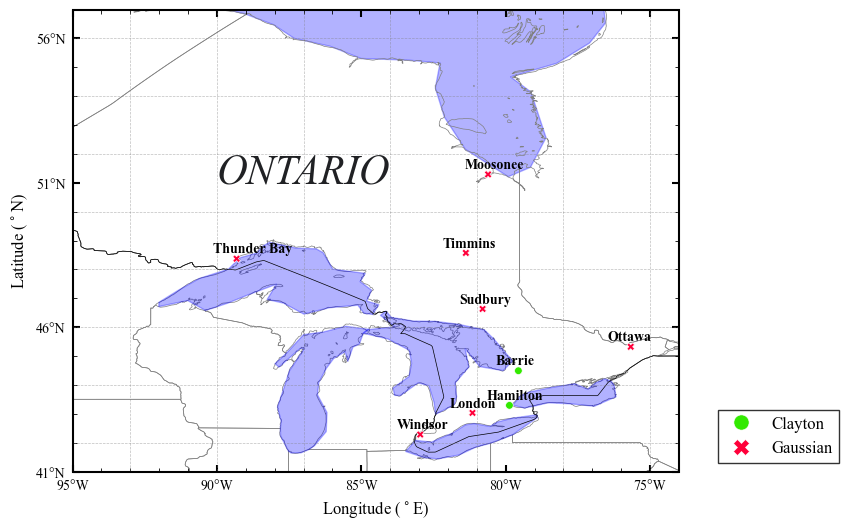

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from adjustText import adjust_text
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.io.shapereader as shpreader

# 2. Setup Figure with Geographic Projection
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.set_extent([-95, -74, 41, 57], crs=ccrs.PlateCarree()) # Ontario focus


# 2. Add Longitude and Latitude Gridlines (Coordinate reference)
gl = ax.gridlines(
    crs=ccrs.PlateCarree(), 
    draw_labels=False,      # Enables text labels on the axes
    linewidth=0.5, 
    color='gray', 
    alpha=0.5, 
    linestyle='--'
)

# 2. Set standard Matplotlib Ticks
# Define your tick locations (adjust range/step as needed for your data)
# Syntax: np.arange(start, stop, step)
ax.set_xticks(np.arange(-95, -70, 5), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(41, 60, 5), crs=ccrs.PlateCarree())

# 3. Format them as Coordinates (N/S/E/W)
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

# 4. Enforce Tick Styling
# This ensures they point INWARD and use your Bold settings
ax.tick_params(
    axis='both', 
    which='major', 
    direction='in', 
    length=5, 
    width=1.5, 
    colors='black', 
    top=True, 
    right=True,
    labelsize=10
)

# Optional: Adjust label padding if they are too close to the ticks
ax.tick_params(axis='x', pad=5)
ax.tick_params(axis='y', pad=5)


# Add geographic features for context
# ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='gray', linewidth=0.5)
ax.add_feature(cfeature.LAKES.with_scale('110m'), edgecolor='blue', facecolor='blue', alpha=0.3)
ax.add_feature(cfeature.OCEAN.with_scale('110m'), edgecolor='blue', facecolor='blue', alpha=0.3)
ax.add_feature(cfeature.BORDERS.with_scale('10m'), edgecolor='black', linewidth=0.5)
# ax.add_feature(cfeature.LAND.with_scale('10m'), facecolor='lightgrey', linewidth=0.5)



# 3. Plot Data
# Use distinct markers + color for B&W accessibility
scatter = sns.scatterplot(
    data=plot_df, x="longitude", y="latitude", 
    hue="best_family", style="best_family", 
    s=30, ax=ax, palette="prism", transform=ccrs.PlateCarree(),
    zorder=5
)

texts = []
t = ax.text(
    -90,51, "ONTARIO", color="#202124",
    transform=ccrs.PlateCarree(), fontsize=30, fontstyle='italic'
)
texts.append(t)
for _, row in plot_df.iterrows():
    t = ax.text(
        row["longitude"]-0.8, row["latitude"]+0.2, row["label"], 
        transform=ccrs.PlateCarree(), fontsize=10, fontweight='bold'
    )
    texts.append(t)

# Formatting axes (Decimal Degrees are standard SI)
ax.set_xlabel(r"Longitude ($^\circ$E)")
ax.set_ylabel(r"Latitude ($^\circ$N)")

# Place legend outside to avoid obscuring data
leg = ax.legend(
    fontsize=12, 
    loc='lower left',           # Anchors the legend's bottom-left to the point below
    bbox_to_anchor=(1.05, 0),   # Placed slightly to the right (1.05) and at the bottom (0)
    markerscale=2
)

# Set the border color to black
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

# 5. Export for Submission
# plt.savefig("Figure_1.pdf", bbox_inches='tight')
plt.show()